In [109]:
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import KMeans
from keras.layers import Input, Dense
from keras.models import Model, load_model

In [99]:
image = np.load('image.npy')

In [100]:
image = image/255. - 0.5

In [101]:
encoding_dim = 64  
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='tanh')(decoded)

autoencoder = Model(input_img, decoded)

In [102]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
#encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-1]
# create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))


In [103]:
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(image, image,
                epochs=30,
                batch_size=512,
                shuffle=True,
                )

Epoch 1/30
140000/140000 [==============================] - 20s - loss: 0.0435    
Epoch 2/30
140000/140000 [==============================] - 17s - loss: 0.0239    
Epoch 3/30
140000/140000 [==============================] - 17s - loss: 0.0198    
Epoch 4/30
140000/140000 [==============================] - 18s - loss: 0.0176    
Epoch 5/30
140000/140000 [==============================] - 14s - loss: 0.0164    
Epoch 6/30
140000/140000 [==============================] - 128s - loss: 0.0156   
Epoch 7/30
140000/140000 [==============================] - 181s - loss: 0.0150   
Epoch 8/30
140000/140000 [==============================] - 25s - loss: 0.0145    
Epoch 9/30
140000/140000 [==============================] - 51s - loss: 0.0141    
Epoch 10/30
140000/140000 [==============================] - 26s - loss: 0.0138    
Epoch 11/30
140000/140000 [==============================] - 545s - loss: 0.0136   
Epoch 12/30
140000/140000 [==============================] - 360s - loss: 0.0133   
E

In [92]:
encoded_imgs = encoder.predict(image)
decoded_imgs = autoencoder.predict(image)

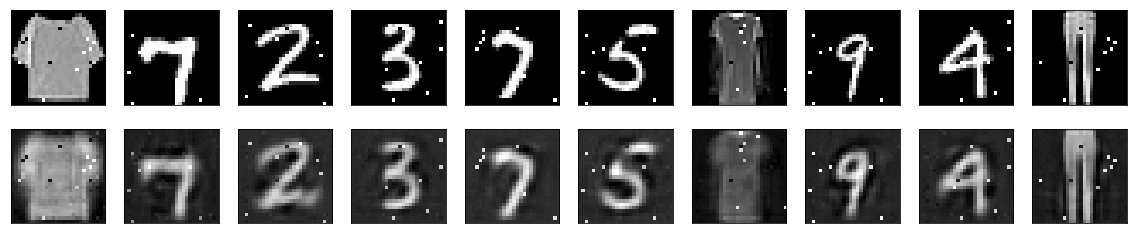

In [93]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [104]:
image_re = encoder.predict(image)

In [105]:
kmeans_fit = KMeans(n_clusters = 2).fit(image_re)
cluster_labels = kmeans_fit.labels_

In [106]:
text = open('test_case.csv', 'r') 
row = csv.reader(text , delimiter="\n")
count = 0
first = []
second = []
for r in row:
    if count > 0:
        r = r[0].split(',')
        first.append(int(r[1]))
        second.append(int(r[2]))
    count = 1
text.close()

ans = []
for i in range(len(first)):
    ans.append([str(i)])
    if cluster_labels[first[i]] == cluster_labels[second[i]]:
        a = str(1)
    else:
        a = str(0)
    ans[i].append(a)

filename = 'hw6_autoencoder_dim=64_1226_2.csv'
text = open(filename, "w+")
s = csv.writer(text,delimiter=',',lineterminator='\n')
s.writerow(['ID','Ans'])
for i in range(len(ans)):
    s.writerow(ans[i]) 
text.close()

In [107]:
encoder.save('hw6_encoder_dim=64_1226_2.hdf5')

In [108]:
autoencoder.save('hw6_autoencoder_dim=64_1226_2.hdf5')

In [165]:
encoder = load_model('hw6_encoder_dim=64_1226_2.hdf5')

/Users/uri/anaconda/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [166]:
tmp = np.load('visualization.npy')

In [167]:
res = encoder.predict(tmp)

In [168]:
kmeans_fit = KMeans(n_clusters = 2).fit(res)
cluster_labels = kmeans_fit.labels_

In [169]:
cluster_labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

In [136]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#for_vis = PCA(n_components=2).fit_transform(res)
for_vis = TSNE(n_components=2).fit_transform(res)

In [137]:
for_vis

array([[ -6.79622979e+10,   9.03971214e+11],
       [ -2.42886243e+11,  -2.44494542e+11],
       [  3.45784112e+11,  -3.59521134e+11],
       ..., 
       [ -8.01760261e+11,   2.83770001e+11],
       [  2.76140822e+10,   7.52042627e+11],
       [  8.98288684e+11,  -1.22862198e+12]])

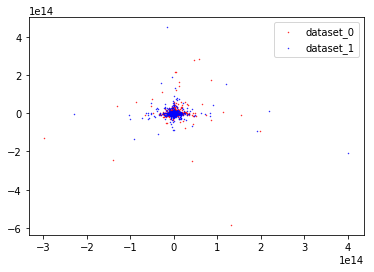

In [182]:
#plt.figure()
plt.scatter(for_vis[0:5000,0], for_vis[0:5000,1], c = 'r', label = 'dataset_0', s = 0.2)
plt.scatter(for_vis[5000:10000,0], for_vis[5000:10000,1], c = 'b',label = 'dataset_1', s = 0.2)
plt.legend()
plt.savefig('label_2.png')
plt.show()

In [178]:
red = []
blue = []
for k in range(10000):
    if cluster_labels[k] == 0:
        red.append(for_vis[k])
    else:
        blue.append(for_vis[k])
red = np.array(red)
blue = np.array(blue)

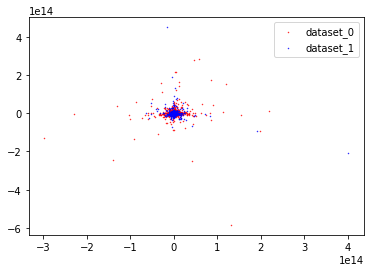

In [181]:
plt.scatter(red[:,0], red[:,1], c = 'r' , label = 'dataset_0', s = 0.2)
plt.scatter(blue[:,0], blue[:,1], c = 'b' , label = 'dataset_1', s = 0.2)
#plt.scatter(for_vis[5000:10000,0], for_vis[5000:10000,1], c = 'b',marker = 'o')
plt.legend()
plt.savefig('label.png')
plt.show()